In [3]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [4]:
#Declare an array of news channel
array_news = ["@BBC","@CBS","@CNN","@Fox","@nytimes"]

sentiment_list = []
#Logic to analyse tweets per news channel
for x in array_news:
    
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    counter_list = []
    tweetnumber = 1
    # Get all tweets from home feed
    public_tweets = api.user_timeline(x, count=100, result_type="recent")
    for tweet in public_tweets:
        #Sentiment analyser
        results = analyzer.polarity_scores(tweet["text"])
        text = tweet["text"]
        datetime_object = datetime.strptime("Fri Oct 05 19:04:05 +0000 2018","%a %b %d %H:%M:%S %z %Y")
        date = datetime_object.strftime("%m/%d/%Y")
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        #Replace @ for better display in scatter plot
        x= x.replace("@","")
        #Append all the tweets
        sentiment_list.append({
            "News Channel": x,
            "Tweet Text": text,
            "Tweet Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Tweet Ago": tweetnumber })
        tweetnumber = tweetnumber + 1
print(sentiment_list) 


[{'News Channel': 'BBC', 'Tweet Text': 'Franklin and his gang are now the main dealers in the area but success brings new problems...\n\n#Snowfall | 10:50pm… https://t.co/ZBmiDiGpWy', 'Tweet Date': '10/05/2018', 'Compound': 0.7227, 'Positive': 0.21, 'Negative': 0.0, 'Neutral': 0.79, 'Tweet Ago': 1}, {'News Channel': 'BBC', 'Tweet Text': 'A poetic account of the Troubles in Northern Ireland, told through the stories of people who lost loved ones during… https://t.co/ZMdNqwA6QJ', 'Tweet Date': '10/05/2018', 'Compound': -0.1027, 'Positive': 0.149, 'Negative': 0.202, 'Neutral': 0.649, 'Tweet Ago': 2}, {'News Channel': 'BBC', 'Tweet Text': 'Most polite stag do ever 😂 https://t.co/Vdz6abFUA5', 'Tweet Date': '10/05/2018', 'Compound': 0.4404, 'Positive': 0.259, 'Negative': 0.129, 'Neutral': 0.612, 'Tweet Ago': 3}, {'News Channel': 'BBC', 'Tweet Text': 'A horse walks into a bar... https://t.co/0e9rcMyq26', 'Tweet Date': '10/05/2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral':

In [5]:
#Write to csv
sentiments_pd = pd.DataFrame(sentiment_list).set_index("News Channel")
sentiments_pd.to_csv("News_Mood_Scatter.csv")
sentiments_pd.head()

,Compound,Negative,Neutral,Positive,Tweet Ago,Tweet Date,Tweet Text
News Channel,,,,,,,
BBC,0.7227,0.000,0.790,0.210,1,10/05/2018,Franklin and his gang are now the main dealers...
BBC,-0.1027,0.202,0.649,0.149,2,10/05/2018,A poetic account of the Troubles in Northern I...
BBC,0.4404,0.129,0.612,0.259,3,10/05/2018,Most polite stag do ever 😂 https://t.co/Vdz6ab...
BBC,0.0000,0.000,1.000,0.000,4,10/05/2018,A horse walks into a bar... https://t.co/0e9rc...
BBC,0.4939,0.000,0.819,0.181,5,10/05/2018,Hundreds of sculptures lie at the bottom of th...


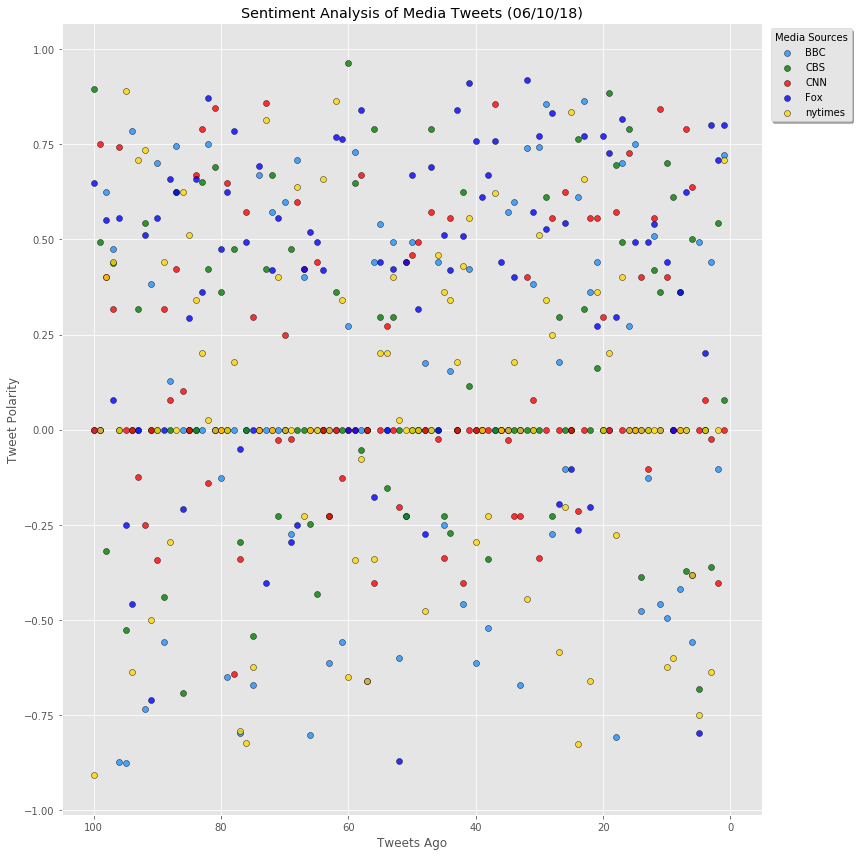

In [6]:
# Create plot
plt.figure(figsize=(12,12))
channel_colors ={
    "BBC":"dodgerblue",
    "CBS":"green",
    "CNN":"r",
    "Fox":"blue",
    "nytimes":"gold"
}

#Loop through dict
for channel_color in channel_colors.keys():
    df=sentiments_pd.loc[sentiments_pd.index==channel_color,:]
    plt.scatter(df["Tweet Ago"],df["Compound"], marker="o",color=channel_colors[channel_color],alpha=0.8,edgecolors="black",label = channel_color)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%d/%m/%y")
plt.legend(loc="upper center", bbox_to_anchor =(1.07, 1), title = 'Media Sources',shadow=True, ncol=1)
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([105,-5]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Sentiment_Scatter.png",bbox_inches = 'tight')
plt.tight_layout()
plt.show()

In [7]:
#Calculate mean value of each compound sentiment and round it 
meanValue_BBC = round(sentiments_pd[sentiments_pd.index=="BBC"]["Compound"].mean(),2)
meanValue_CBS = round(sentiments_pd[sentiments_pd.index=="CBS"]["Compound"].mean(),2)
meanValue_CNN = round(sentiments_pd[sentiments_pd.index=="CNN"]["Compound"].mean(),2)
meanValue_Fox = round(sentiments_pd[sentiments_pd.index=="Fox"]["Compound"].mean(),2)
meanValue_NewYorkTimes = round(sentiments_pd[sentiments_pd.index=="nytimes"]["Compound"].mean(),2)

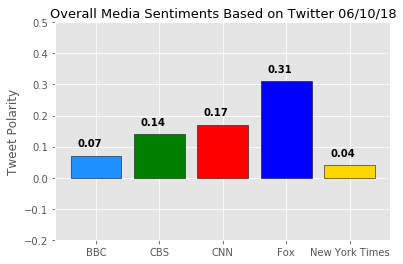

In [8]:
#Create dict
x_bar_dict = {
    "BBC":meanValue_BBC,
    "CBS":meanValue_CBS,
    "CNN":meanValue_CNN,
    "Fox":meanValue_Fox,
    "New York Times":meanValue_NewYorkTimes}
#Create plot
plt.bar(x_bar_dict.keys(),x_bar_dict.values(),color =('dodgerblue', 'green', 'r', 'blue', 'gold'), edgecolor = "black")
    
# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%d/%m/%y")    
plt.title(f'Overall Media Sentiments Based on Twitter {now}', fontsize = 13)
plt.ylabel("Tweet Polarity")
plt.ylim(-0.2, 0.50)


for i, v in enumerate(x_bar_dict.values()):
    plt.text(i-.3, v+.03, str(v).format(), color='black', fontweight='bold')
#Save Figure
plt.savefig("Sentiment_Bar.png",bbox_inches = 'tight')
plt.show()    

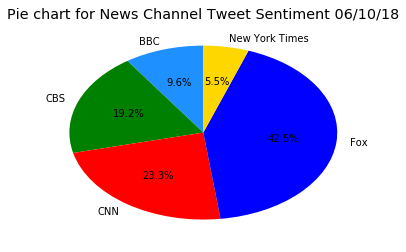

In [9]:
#TA's- I am drawing pie chart just for my practice here
#variable declaration
tot_value=0
array_channel_percentage = []

#loop to get percentage of each channel
for x in x_bar_dict.keys():
    tot_value = tot_value + x_bar_dict[x]
for x in x_bar_dict.keys():
    array_channel_percentage.append((x_bar_dict[x]/tot_value)*100)
    
#Draw a plot
plt.pie(array_channel_percentage,labels=x_bar_dict.keys(),colors=channel_colors.values(),startangle=90,autopct='%.1f%%')

#add additional properties to pie chart
now = datetime.now()
now = now.strftime("%d/%m/%y")
plt.title(f"Pie chart for News Channel Tweet Sentiment {now}")
plt.savefig("Sentiment_Pie.png",bbox_inches = 'tight')
plt.show()

In [68]:
Written Description of four observable trends
1. After taking out mean of all compound sentiments I found that overall there are no negative sentiment(shown in bar chart)
2. Fox has the most positive tweets(shown in bar chart)
3. Tweet sentiments across all channel are more positive(shown in scatter plot ) 
4. Fox shares 42.5% of positive sentiment across all news channels (shown in pie chart)

SyntaxError: invalid syntax (<ipython-input-68-f50c290a44fa>, line 2)